12709


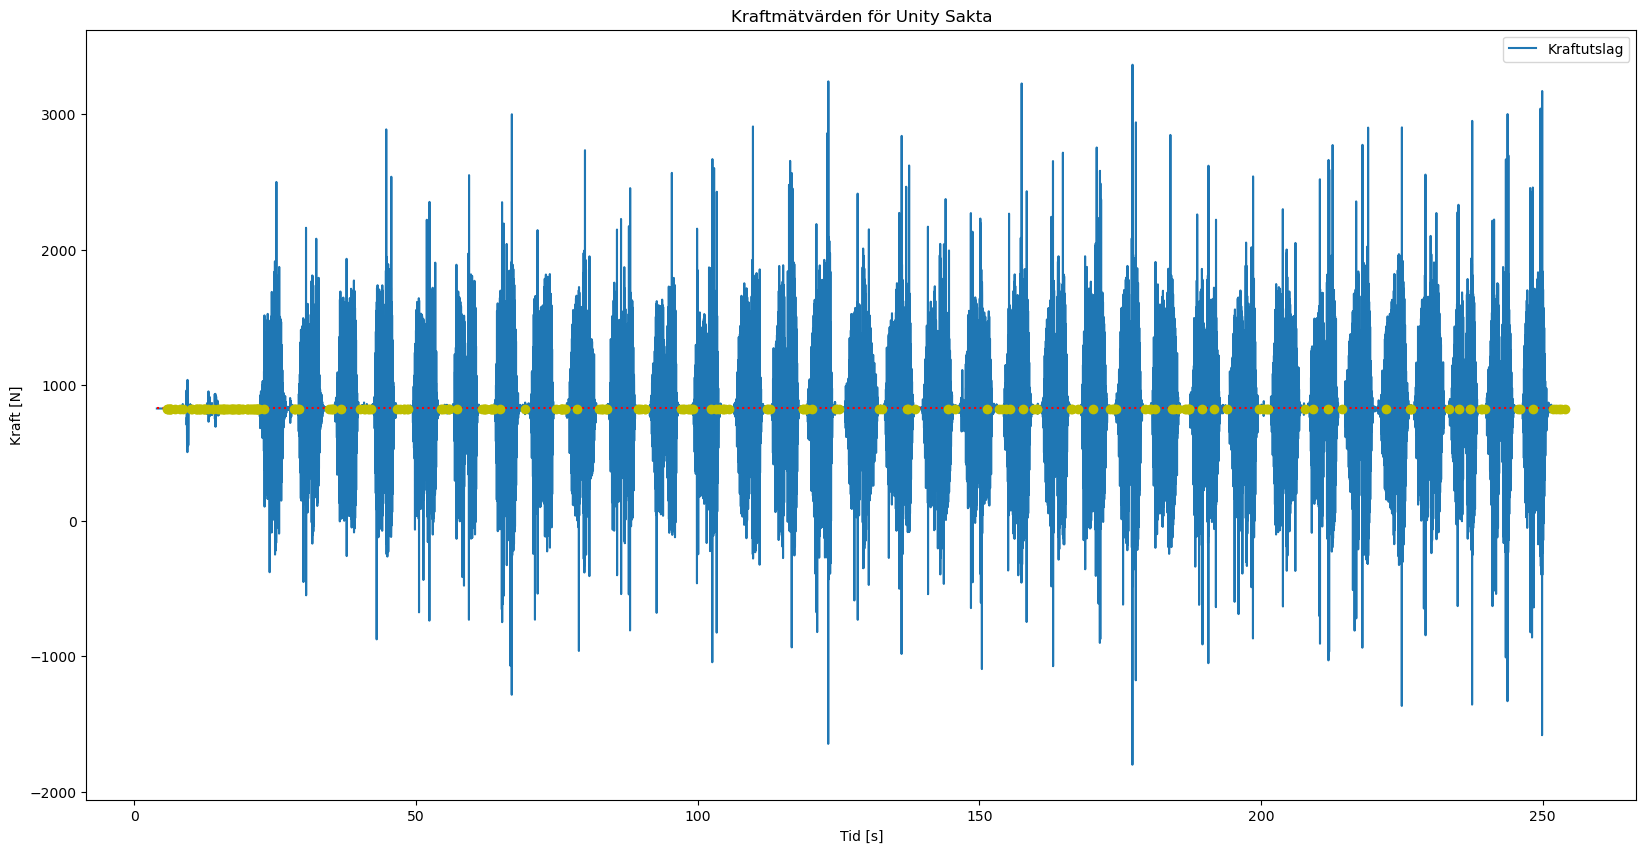

In [31]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import math
import numpy as np


unitySlowDF = pd.read_csv("values/unitydata_slow_faster.csv")
print(len(unitySlowDF))
#unitySlowDF.name = "Unity Slow"
unitySlowDF.name = "Unity Sakta"

fig, ax = plt.subplots(1,1, figsize=(20,10))

tmpName = unitySlowDF.name
unitySlowDF = unitySlowDF[200:len(unitySlowDF)-1]
unitySlowDF = unitySlowDF.reset_index()
unitySlowDF.name = tmpName
unitySlowDF.drop(columns=['index'], inplace=True)

crossX = []
crossY = []

i = 0
while(i < len(unitySlowDF)):
    if(math.isclose(unitySlowDF['force'][i], unitySlowDF["force"].median(),abs_tol=0.2)):
        crossX.append(unitySlowDF["time"][i])
        crossY.append(unitySlowDF["force"][i])
    i += 1


ax.plot(unitySlowDF['time'],unitySlowDF['force'], label="Kraftutslag")
ax.hlines(unitySlowDF['force'].mean(), xmin=unitySlowDF['time'][0], xmax=unitySlowDF['time'][len(unitySlowDF)-1], linestyles="dotted", color="red")
ax.plot(crossX, crossY, "yo")

ax.set_xlabel("Tid [s]")
ax.set_ylabel("Kraft [N]")
ax.set_title(f"Kraftmätvärden för {unitySlowDF.name}")
ax.legend()
plt.show()

12709


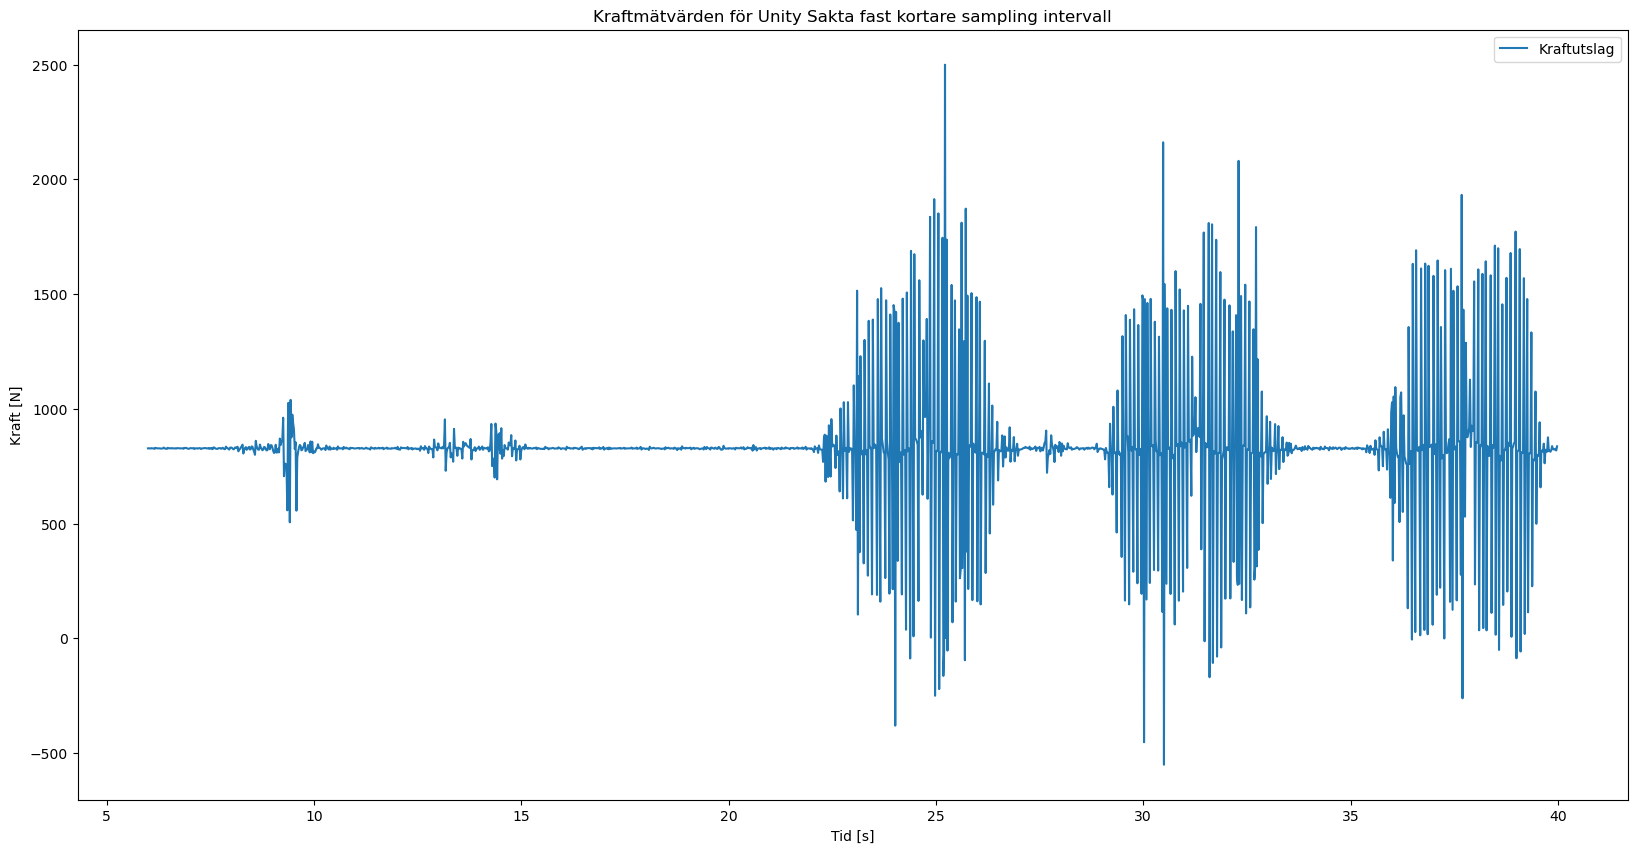

In [39]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import math
import numpy as np


unitySlowDF = pd.read_csv("values/unitydata_slow_faster.csv")
print(len(unitySlowDF))
#unitySlowDF.name = "Unity Slow"
unitySlowDF.name = "Unity Sakta fast kortare sampling intervall"

fig, ax = plt.subplots(1,1, figsize=(20,10))

tmpName = unitySlowDF.name
unitySlowDF = unitySlowDF[300:2000]
unitySlowDF = unitySlowDF.reset_index()
unitySlowDF.name = tmpName
unitySlowDF.drop(columns=['index'], inplace=True)


ax.plot(unitySlowDF['time'],unitySlowDF['force'], label="Kraftutslag")

ax.set_xlabel("Tid [s]")
ax.set_ylabel("Kraft [N]")
ax.set_title(f"Kraftmätvärden för {unitySlowDF.name}")
ax.legend()
plt.show()

In [ ]:
def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4


    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]

    ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    averageMaxForce = maximaForce.mean()
    averageMinForce = minimaForce.mean()

    ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()
    
    return minimaForce, maximaForce

minimaForceUnitySlow, maximaForceUnitySlow = showMaximaAndMinimaForDataframe(dataframe=unitySlowDF, rangeTo=100, title="Unity (Sakta benböj)", nrOfSquats=4)
minimaForceUnityFast, maximaForceUnityFast = showMaximaAndMinimaForDataframe(dataframe=unityFastDF, rangeTo=100, title="Unity (Snabba benböj)", nrOfSquats=4)

minimaForceWiiFitSlow, maximaForceWiiFitSlow = showMaximaAndMinimaForDataframe(dataframe=wiiFitSlowDF, rangeTo=100, title="Wii fit (Sakta benböj)", nrOfSquats=4)
minimaForceWiiFitFast, maximaForceWiiFitFast = showMaximaAndMinimaForDataframe(dataframe=wiiFitFastDF, rangeTo=100, title="Wii fit (Snabba benböj)", nrOfSquats=4)


In [ ]:
#Import math Library
import math

def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4


    ## Detta ska okommenteras om man vill se alla punkter
    # ax1.plot(localMaximaTime,localMaximaForce, "ro", label="Lokal Maximi")
    # ax1.plot(localMinimaTime,localMinimaForce, "go", label="Lokal Minimi")

    data0 = {
        "time":localMaximaTime,
        "force":localMaximaForce,
        "maxima":True
    }
    data1 = {
        "time":localMinimaTime,
        "force":localMinimaForce,
        "maxima":False
    }
    
    df0 = pd.DataFrame(data0)
    df1 = pd.DataFrame(data1)
    dfFull = pd.concat([df0,df1])
    dfFull.sort_values(by='time')
    
    minimaForce0 = []
    minimaTime0 = []
    
    #for row in dfFull:
    # Titta om man är vid "near" ett visst värde.
    # Kolla toppar, och bottar. På något vis....   
    

    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    #ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]


    ## Test för att se om det går att hitta om det är nära Medianen.
    closeToMedianPointsForce = []
    closeToMedianPointsTime = []
    i = 0
    tolerance = 23
    while(i < len(dataframeMinima['minima'])):
        if(math.isclose(dataframeMinima['minima'][i], sliceOfData['force'].mean(), abs_tol=tolerance)):
            closeToMedianPointsForce.append(dataframeMinima['minima'][i])
            closeToMedianPointsTime.append(dataframeMinima['time'][i])
        i = i + 1
    
    i = 0
    while(i < len(dataframeMaxima['maxima'])):
        if(math.isclose(dataframeMaxima['maxima'][i], sliceOfData['force'].mean(), abs_tol=tolerance)):
            closeToMedianPointsForce.append(dataframeMaxima['maxima'][i])
            closeToMedianPointsTime.append(dataframeMaxima['time'][i])
        i = i + 1
    
    ax1.plot(closeToMedianPointsTime,closeToMedianPointsForce, 'go', label="Nära medinen")
                
    #ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    #averageMaxForce = maximaForce.mean()
    #averageMinForce = minimaForce.mean()

    #ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    #ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    #ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    #ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()

#showMaximaAndMinimaForDataframe(dataframe=unityDF, rangeTo=200, title="Unity", nrOfSquats=9)
showMaximaAndMinimaForDataframe(dataframe=wiiFitSlowDF, rangeTo=300, title="Wii Fit (Sakta benböj)", nrOfSquats=4)
showMaximaAndMinimaForDataframe(dataframe=wiiFitFastDF, rangeTo=300, title="Wii Fit (Snabba benböj)", nrOfSquats=4)
showMaximaAndMinimaForDataframe(dataframe=unitySlowDF, rangeTo=300, title="Unity (Sakta benböj)", nrOfSquats=4)
showMaximaAndMinimaForDataframe(dataframe=unityFastDF, rangeTo=100, title="Unity (Snabba benböj) ", nrOfSquats=4)




In [ ]:
def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4

    #ax1.plot(localMaximaTime,localMaximaForce, "ro", label="Lokal Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, "go", label="Lokal Minimi")

    data0 = {
        "time":localMaximaTime,
        "force":localMaximaForce,
        "maxima":True
    }
    data1 = {
        "time":localMinimaTime,
        "force":localMinimaForce,
        "maxima":False
    }
    
    df0 = pd.DataFrame(data0)
    df1 = pd.DataFrame(data1)
    dfFull = pd.concat([df0,df1])
    dfFull.sort_values(by='time')
    
    minimaForce0 = []
    minimaTime0 = []
    
    #for row in dfFull:
    # Titta om man är vid "near" ett visst värde.
    # Kolla toppar, och bottar. På något vis....   
    

    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]

    ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    
    for time, force in zip(minimaTime, minimaForce):
        ax1.text(time+2, force, f'{force:.5} [N]', fontsize = 6)

    for time, force in zip(maximaTime, maximaForce):
        ax1.text(time+2, force, f'{force:.5} [N]', fontsize = 6)
        

    #averageMaxForce = maximaForce.mean()
    #averageMinForce = minimaForce.mean()

    #ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    #ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    #ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    #ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()

#showMaximaAndMinimaForDataframe(dataframe=unityDF, rangeTo=200, title="Unity", nrOfSquats=9)
showMaximaAndMinimaForDataframe(dataframe=unitySlowDF, rangeTo=len(unitySlowDF['time']), title="Unity (Sakta benböj)", nrOfSquats=40)
showMaximaAndMinimaForDataframe(dataframe=unityFastDF, rangeTo=len(unityFastDF['time']), title="Unity (Snabba benböj)", nrOfSquats=40)

showMaximaAndMinimaForDataframe(dataframe=wiiFitSlowDF, rangeTo=len(wiiFitSlowDF['time']), title="Wii Fit (Sakta benböj)", nrOfSquats=40)
showMaximaAndMinimaForDataframe(dataframe=wiiFitFastDF, rangeTo=len(wiiFitFastDF['time']), title="Wii Fit (Snabba benböj)", nrOfSquats=40)





För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.  
y = kx + m => k = Δy / Δx => k = y2- y1 / x2 - x1

[[Källa]](https://stackoverflow.com/questions/69000410/extract-and-plot-the-first-derivative-of-a-curve-in-python-without-knowing-its-f)

Möjligtvis inttresant [[Källa]](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)
